In [20]:
import numpy as np
import pandas as pd

In [24]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
crop.info()
crop.isnull().sum()
crop.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


0

In [28]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [30]:
# Select only numeric columns
numeric_cols = crop.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Display the correlation matrix
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


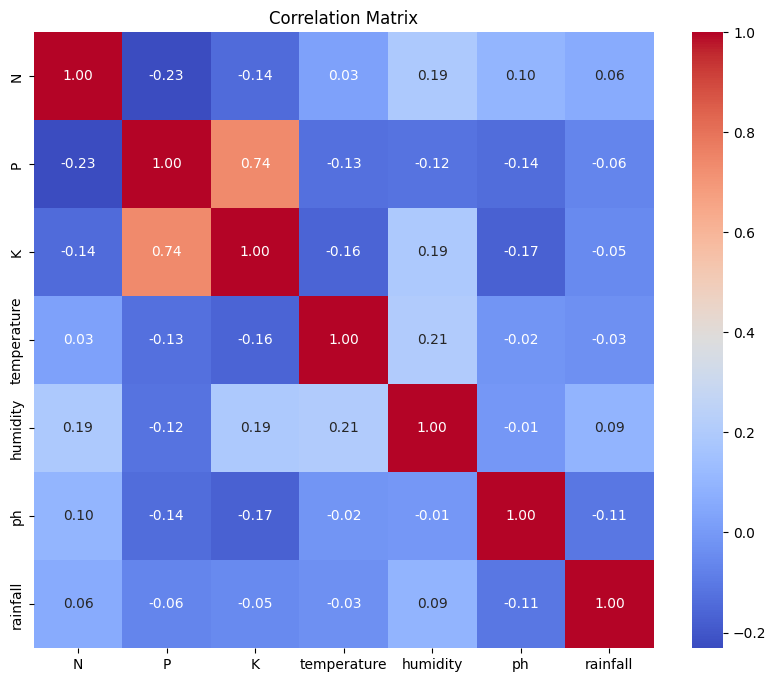

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [36]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [38]:
if 'label' in crop.columns:
    crop = crop.drop('label', axis=1)
else:
    print("Column 'label' does not exist in the DataFrame")

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [40]:
X = crop.drop('crop_num', axis = 1)
y = crop['crop_num']

In [42]:
X.shape

(2200, 7)

In [44]:
y.shape

(2200,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1760, 7) (1760,)
Test set shape: (440, 7) (440,)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [50]:
# Check mean and variance for StandardScaler
print("Training data mean:", np.mean(X_train_scaled, axis=0))
print("Training data variance:", np.var(X_train_scaled, axis=0))

# Check range for MinMaxScaler
print("Training data min:", np.min(X_train_scaled, axis=0))
print("Training data max:", np.max(X_train_scaled, axis=0))


Training data mean: [-2.42230478e-17  8.83131951e-17  7.36784371e-17  1.95802970e-16
 -9.28550166e-17 -6.74208164e-16  8.27620800e-17]
Training data variance: [1. 1. 1. 1. 1. 1. 1.]
Training data min: [-1.35934556 -1.45730021 -0.84475734 -3.29243573 -2.60184229 -3.84258943
 -1.49811914]
Training data max: [2.39528123 2.75718989 3.0719258  3.55613931 1.29086199 4.47366472
 3.56592225]


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]  # Example values; adjust as needed
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Extra Trees': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}


In [56]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}

In [58]:
# Perform grid search for each model
for name, model in models.items():
    param_grid = param_grids.get(name, {})
    if param_grid:  # Only apply GridSearchCV if there are parameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        ypred = best_model.predict(X_test_scaled)
        print(f"{name} with best parameters: {grid_search.best_params_} and accuracy: {accuracy_score(y_test, ypred)}")
    else:
        model.fit(X_train_scaled, y_train)
        ypred = model.predict(X_test_scaled)
        print(f"{name} (no hyperparameters) with accuracy: {accuracy_score(y_test, ypred)}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression with best parameters: {'C': 10} and accuracy: 0.9704545454545455
Naive Bayes (no hyperparameters) with accuracy: 0.9954545454545455
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Support Vector Machine with best parameters: {'C': 10, 'kernel': 'rbf'} and accuracy: 0.9795454545454545
Fitting 5 folds for each of 6 candidates, totalling 30 fits
K-Nearest Neighbors with best parameters: {'n_neighbors': 3, 'weights': 'uniform'} and accuracy: 0.9681818181818181
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Decision Tree with best parameters: {'max_depth': 10, 'min_samples_split': 2} and accuracy: 0.9886363636363636
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest with best parameters: {'max_depth': 10, 'n_estimators': 200} and accuracy: 0.9931818181818182
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Bagging with best parameters: {'n_estimators': 1

C:\Users\Anish\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with best parameters: {'learning_rate': 0.1, 'n_estimators': 50} and accuracy: 0.865909090909091
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Gradient Boosting with best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} and accuracy: 0.9886363636363636
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Extra Trees with best parameters: {'max_depth': None, 'min_samples_split': 2} and accuracy: 0.9363636363636364


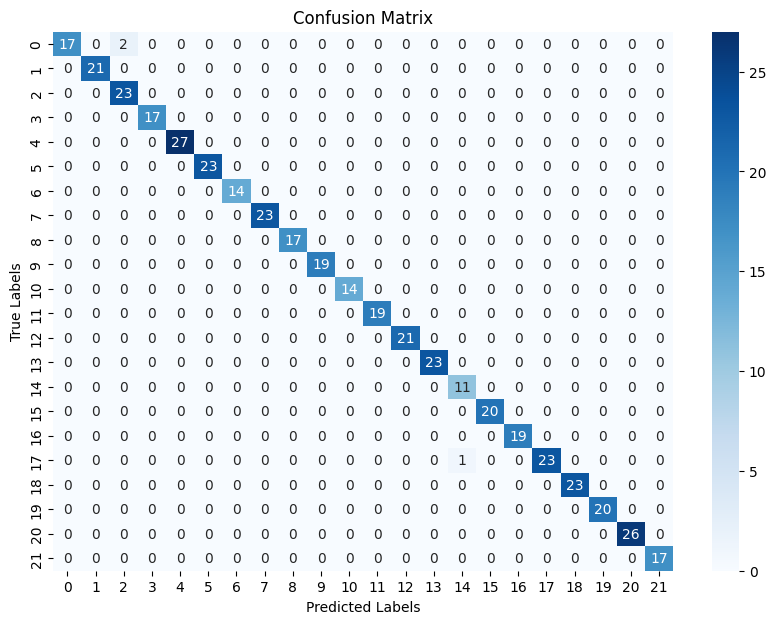

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       0.92      1.00      0.96        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        19
   

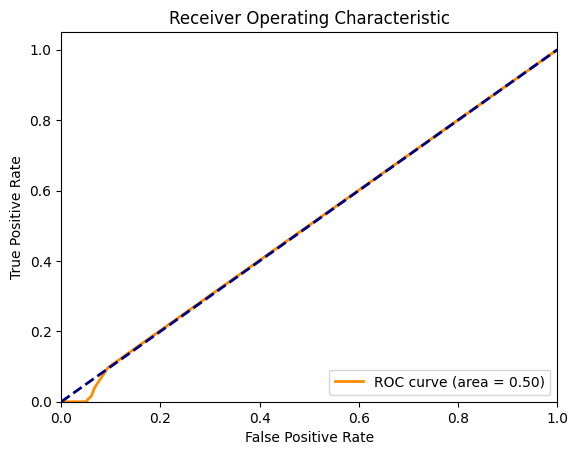

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Choosing the Random Forest model for evaluation
best_model = RandomForestClassifier(max_depth=None, n_estimators=50)
best_model.fit(X_train_scaled, y_train)
ypred = best_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ypred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, ypred))

# ROC Curve (if applicable)
# For multiclass classification, ROC curves are usually computed in a one-vs-rest manner
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.arange(len(crop_dict)))
ypred_prob = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), ypred_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [62]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(max_depth=None, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Function to predict the crop
def predict_crop(params):
    # Ensure the input parameters match the feature columns
    # Example input: {'N': 20, 'P': 30, 'K': 40, 'temperature': 30, 'humidity': 60, 'ph': 6, 'rainfall': 100}
    
    # Convert the input parameters into a DataFrame
    input_data = pd.DataFrame([params], columns=X.columns)
    
    # Predict using the trained model
    prediction = rf_model.predict(input_data)
    
    # Convert numerical label to crop name if necessary
    reverse_crop_dict = {v: k for k, v in crop_dict.items()}
    predicted_crop = reverse_crop_dict[prediction[0]]
    
    return predicted_crop

# Example usage
params = {
    'N': 101,
    'P': 92,
    'K': 45,
    'temperature': 28.2,
    'humidity': 80.6,
    'ph': 5.75,
    'rainfall': 98.00
}

predicted_crop = predict_crop(params)
print(f"The predicted crop is: {predicted_crop}")

The predicted crop is: banana


In [64]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.9931818181818182


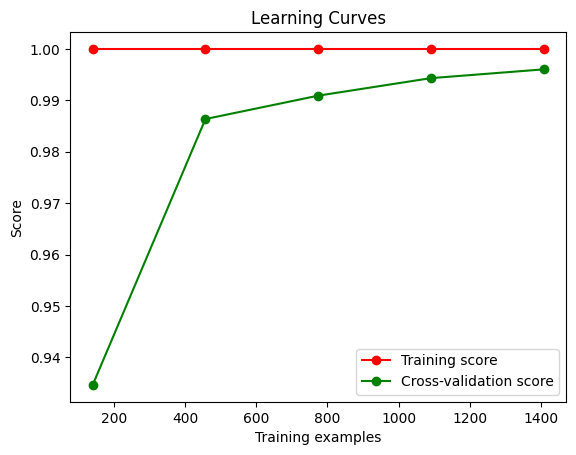

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Use the scaled data
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


In [68]:
import joblib

# Assuming 'best_model' is your trained model
joblib.dump(best_model, 'model.pkl')


['model.pkl']

In [70]:
import sklearn
print(sklearn.__version__)


1.5.1


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier  # or your specific model

# Assuming you have your model trained in a variable named `model`
# Save the model to a file
with open('models/crop_model.joblib', 'wb') as model_file:
    joblib.dump(model, model_file)


In [72]:
!pip show Flask numpy scikit-learn joblib gunicorn


Name: Flask
Version: 2.3.3
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: C:\Users\Anish\anaconda3\Lib\site-packages
Requires: blinker, click, itsdangerous, Jinja2, Werkzeug
Required-by: Flask-Cors, Flask-SocketIO, Flask-SQLAlchemy
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentatio